# Intro to Plotting

matplotlib is a popular plotting module for Python, but it's difficult to use.  Pandas has many plotting functions that indirectly create matplotlib plots for us

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
plt.rcParams["font.size"] = 18

In [4]:
# DataFrame.plot.PLOT_FN(...)
# Series.plot.PLOT_FN(...)
#
# PLOT_FN: line, scatter, bar, pie

In [5]:
# spending: police, fire, metro
s = pd.Series({"police": 50000, "fire": 30000, "metro": 20000})
s

police    50000
fire      30000
metro     20000
dtype: int64

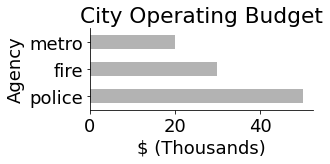

In [6]:
# s.plot.pie() # avoid pie plots, because we don't know abs numbers
# advice: large font and small plots
# bar: vertical, barh: horizontal
ax = (s / 1000).plot.barh(figsize=(4, 1.5), color="0.7")
ax.set_ylabel("Agency")
ax.set_xlabel("$ (Thousands)")
ax.set_title("City Operating Budget")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

Text(0.5, 1.0, 'City Operating Budget')

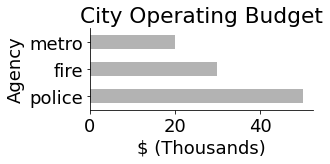

In [7]:
# GENERALIZE AX CONFIG FROM ABOVE
def get_ax(height=1.5):
    _, ax = plt.subplots(figsize=(4, height))
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    return ax

ax = get_ax()
(s / 1000).plot.barh(color="0.7", ax=ax)
ax.set_ylabel("Agency")
ax.set_xlabel("$ (Thousands)")
ax.set_title("City Operating Budget")

In [8]:
import sqlite3

In [9]:
path = "bus.db"
assert os.path.exists(path)
conn = sqlite3.connect(path)

In [10]:
pd.read_sql("""
SELECT *
FROM sqlite_master
""", conn)

,type,name,tbl_name,rootpage,sql
0,table,boarding,boarding,2,"CREATE TABLE ""boarding"" (\n""index"" INTEGER,\n ..."
1,index,ix_boarding_index,boarding,3,"CREATE INDEX ""ix_boarding_index""ON ""boarding"" ..."
2,table,routes,routes,55,"CREATE TABLE ""routes"" (\n""index"" INTEGER,\n ""..."
3,index,ix_routes_index,routes,57,"CREATE INDEX ""ix_routes_index""ON ""routes"" (""in..."


In [11]:
pd.read_sql("""
SELECT *
FROM boarding
LIMIT 5
""", conn)

,index,StopID,Route,Lat,Lon,DailyBoardings
0,0,1163,27,43.073655,-89.385427,1.03
1,1,1163,47,43.073655,-89.385427,0.11
2,2,1163,75,43.073655,-89.385427,0.34
3,3,1164,6,43.106465,-89.340021,10.59
4,4,1167,3,43.077867,-89.369993,3.11


In [12]:
# what the most popular routes, and how many people ride them daily
result = pd.read_sql("""
SELECT route, SUM(DailyBoardings) AS riders
FROM boarding
GROUP BY route
ORDER BY riders DESC
""", conn)
result.head()

,Route,riders
0,80,10211.79
1,2,4808.03
2,6,4537.02
3,10,4425.23
4,3,2708.55


In [13]:
# can only run once without error, because after moving the column
# to the index, it doesn't remain a column that can be moved again
result = result.set_index("Route")
result.head()

,riders
Route,
80,10211.79
2,4808.03
6,4537.02
10,4425.23
3,2708.55


In [14]:
result.index.name

'Route'

In [15]:
riders = result["riders"].iloc[:10]
riders["other"] = result["riders"].iloc[10:].sum()
riders

Route
80       10211.79
2         4808.03
6         4537.02
10        4425.23
3         2708.55
4         2656.99
15        2179.98
38        1955.85
28        1868.31
5         1634.69
other    19000.74
Name: riders, dtype: float64

Text(0, 0.5, 'Riders/Day (1000s)')

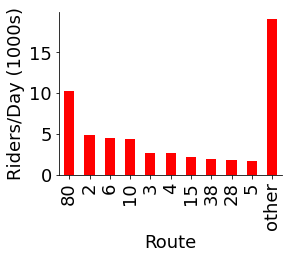

In [16]:
area = get_ax(height=3)
(riders/1000).plot.bar(color="r", ax=area)
area.set_ylabel("Riders/Day (1000s)")

In [17]:
conn.close()

In [18]:
trees = [
    {"age": 1, "height": 1.5, "diameter": 0.8},
    {"age": 1, "height": 1.9, "diameter": 1.2},
    {"age": 1, "height": 1.8, "diameter": 1.4},
    {"age": 2, "height": 1.8, "diameter": 0.9},
    {"age": 2, "height": 2.5, "diameter": 1.5},
    {"age": 2, "height": 3, "diameter": 1.8},
    {"age": 2, "height": 2.9, "diameter": 1.7},
    {"age": 3, "height": 3.2, "diameter": 2.1},
    {"age": 3, "height": 3, "diameter": 2},
    {"age": 3, "height": 2.4, "diameter": 2.2},
    {"age": 2, "height": 3.1, "diameter": 2.9},
    {"age": 4, "height": 2.5, "diameter": 3.1},
    {"age": 4, "height": 3.9, "diameter": 3.1},
    {"age": 4, "height": 4.9, "diameter": 2.8},
    {"age": 4, "height": 5.2, "diameter": 3.5},
    {"age": 4, "height": 4.8, "diameter": 4},
]
df = pd.DataFrame(trees)
df.head()

,age,height,diameter
0,1,1.5,0.8
1,1,1.9,1.2
2,1,1.8,1.4
3,2,1.8,0.9
4,2,2.5,1.5


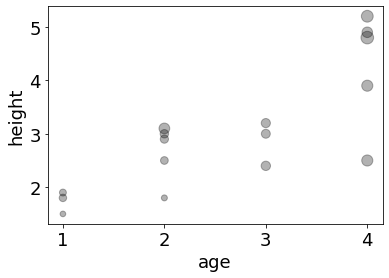

In [19]:
# DATA DIMENSIONS: age, height, diameter
# PLOT DIMENSIONS: x (age), y (height), size, color, marker

df.plot.scatter(x="age", y="height", s=df["diameter"] * 40, c="k", alpha=0.3)